In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('Suzuki_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df.head()
len(df)

1452

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1452 non-null   datetime64[ns]
 1   Price   1452 non-null   int64         
 2   Open    1452 non-null   int64         
 3   High    1452 non-null   int64         
 4   Low     1452 non-null   int64         
 5   Volume  1452 non-null   int64         
 6   Change  1452 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 79.5 KB


In [4]:
print(df)
df.describe()

           Date   Price    Open    High     Low    Volume  Change
0    2018-01-04  674200  660000  674400  658800  19400000     318
1    2018-01-05  674000  674200  677500  668100  20100000      -3
2    2018-01-09  665300  680000  681100  664800  21000000    -129
3    2018-01-10  666600  665000  669900  663600  10700000       2
4    2018-01-11  656400  663400  664400  652800  16600000    -153
...         ...     ...     ...     ...     ...       ...     ...
1447 2023-12-08  574400  573200  576900  567900  23200000     -25
1448 2023-12-11  574200  572400  578200  570800  14900000      -3
1449 2023-12-12  563900  580000  581800  563800  17600000    -179
1450 2023-12-13  568200  560000  569600  554500  19400000      76
1451 2023-12-14  546100  556600  559500  543600  23100000    -389

[1452 rows x 7 columns]


,Date,Price,Open,High,Low,Volume,Change
count,1452,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,2020-12-26 16:00:59.504132352,496801.480716,497107.713499,502584.022039,491423.106061,1.824907e+07,0.806474
min,2018-01-04 00:00:00,246550.000000,246950.000000,255150.000000,243800.000000,4.430000e+06,-1397.000000
25%,2019-07-01 18:00:00,449325.000000,450000.000000,456600.000000,445175.000000,1.260000e+07,-102.250000
50%,2020-12-28 12:00:00,486750.000000,487050.000000,492150.000000,481850.000000,1.630000e+07,0.000000
75%,2022-06-24 18:00:00,542425.000000,542350.000000,550425.000000,536700.000000,2.140000e+07,96.000000
max,2023-12-14 00:00:00,763900.000000,761300.000000,768000.000000,749400.000000,9.980000e+07,1115.000000
std,NaN,83380.223913,83696.512956,83752.459109,83358.342999,8.684992e+06,203.518148


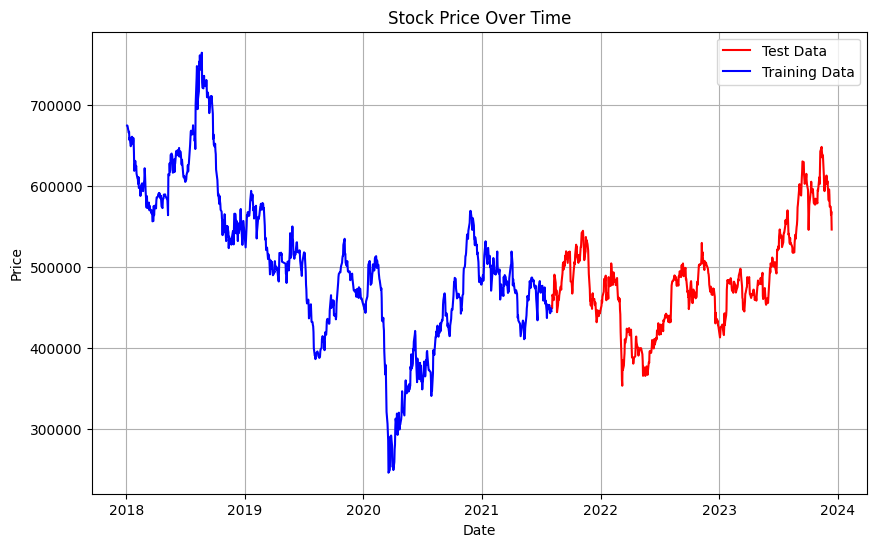

In [5]:
# Split data into training (80%) and test (20%)
train_data, test_data = train_test_split(df, test_size=0.4, shuffle=False)

# Plotting both training and test data on the same chart
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price'], linestyle='-',  color='r', label='Test Data')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Drop the 'Date' column from both X_train and X_test
X_train = train_data.drop(['Price', 'Date'], axis=1)
y_train = train_data['Price']

X_test = test_data.drop(['Price', 'Date'], axis=1)
y_test = test_data['Price']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [7]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
df_for_training = df[cols].astype(float)

[Timestamp('2023-12-14 00:00:00'), Timestamp('2023-12-15 00:00:00'), Timestamp('2023-12-16 00:00:00'), Timestamp('2023-12-17 00:00:00'), Timestamp('2023-12-18 00:00:00'), Timestamp('2023-12-19 00:00:00'), Timestamp('2023-12-20 00:00:00'), Timestamp('2023-12-21 00:00:00'), Timestamp('2023-12-22 00:00:00'), Timestamp('2023-12-23 00:00:00'), Timestamp('2023-12-24 00:00:00'), Timestamp('2023-12-25 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2023-12-27 00:00:00'), Timestamp('2023-12-28 00:00:00'), Timestamp('2023-12-29 00:00:00'), Timestamp('2023-12-30 00:00:00'), Timestamp('2023-12-31 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-01-03 00:00:00'), Timestamp('2024-01-04 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-06 00:00:00'), Timestamp('2024-01-07 00:00:00'), Timestamp('2024-01-08 00:00:00'), Timestamp('2024-01-09 00:00:00'), Timestamp('2024-01-10 00:00:00'), Timestamp('2024-01-11 00:00:00'), Timestamp('20

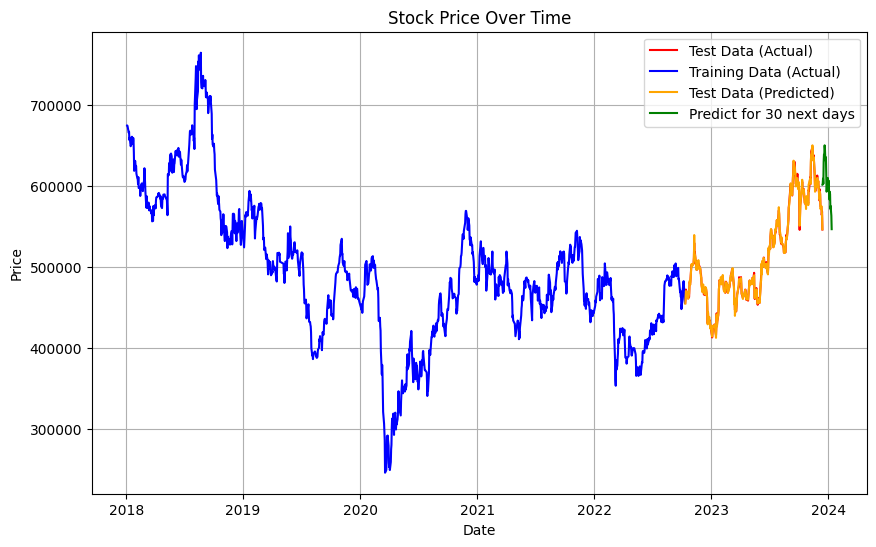

In [8]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have y_test and y_pred already defined
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
hl = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Print the metrics including Huber loss
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'Huber Loss: {hl[0]:.2f}')  # Assuming you have a single output variable

MAPE: 0.37%
MAE: 1953.77
RMSE: 2622.02
Huber Loss: 6874988.22
